In [1]:
# import libraries
import torch 
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# import matplotlib for visualization
import matplotlib.pyplot as plt

# check PyTorch version
# PyTorch version shouldn't be lower than 1.10.0 
# torchvision version shouldn't be lower than 0.11

print(f"PyTorch verison: {torch.__version__}")
print(f"torchvision verison: {torchvision.__version__}")

# check device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device: {device}")

/home/jason/anaconda3/envs/tadac/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


PyTorch verison: 1.12.1+cu102
torchvision verison: 0.13.1+cu102
Device: cuda


#### 1. Getting a dataset

In [2]:
# setup training data
train_data = datasets.FashionMNIST(
    root="../data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None # transform labels
)

# setup testing data
test_data = datasets.FashionMNIST(
    root="../data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

In [3]:
# see first training sample
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

##### 1.1 Input and output shapes of a model

In [4]:
# the shape of the image
image.shape # [color_channels = 1, height=28, width=28]

torch.Size([1, 28, 28])

PyTorch uses `NCHW` for practice
- `N`: Number of images, or batch size
- `C`: Color Channels
- `H`: Height
- `W`: Width

In [5]:
# check len of samples
len(train_data.data), len(train_data.targets)

(60000, 60000)

In [6]:
# check len of samples
len(test_data.data), len(test_data.targets)

(10000, 10000)

In [7]:
# check class names
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

##### 1.2 Visualizing the data

In [8]:
image, label = train_data[0]
print(f"Image shape: {image.shape}")

Image shape: torch.Size([1, 28, 28])


In [9]:
# image shape is [1, 28, 28] (colour channels, height, width)
# use squeeze() -> [28,28]
image.squeeze().shape 

torch.Size([28, 28])

Text(0.5, 1.0, 'Ankle boot')

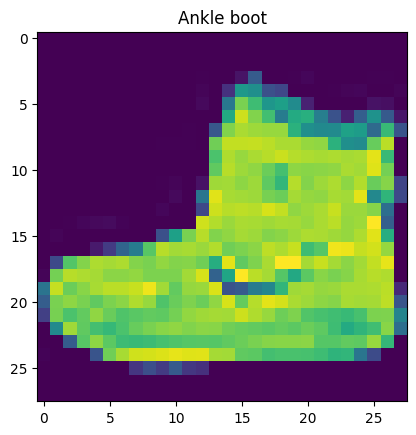

In [10]:
plt.imshow(image.squeeze()) 
plt.title(class_names[label])

Text(0.5, 1.0, 'Ankle boot')

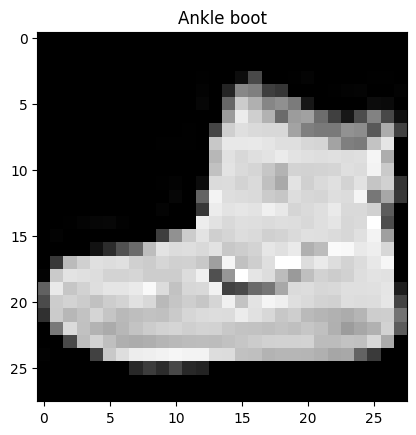

In [11]:
# show a gray image using `cmap`
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])

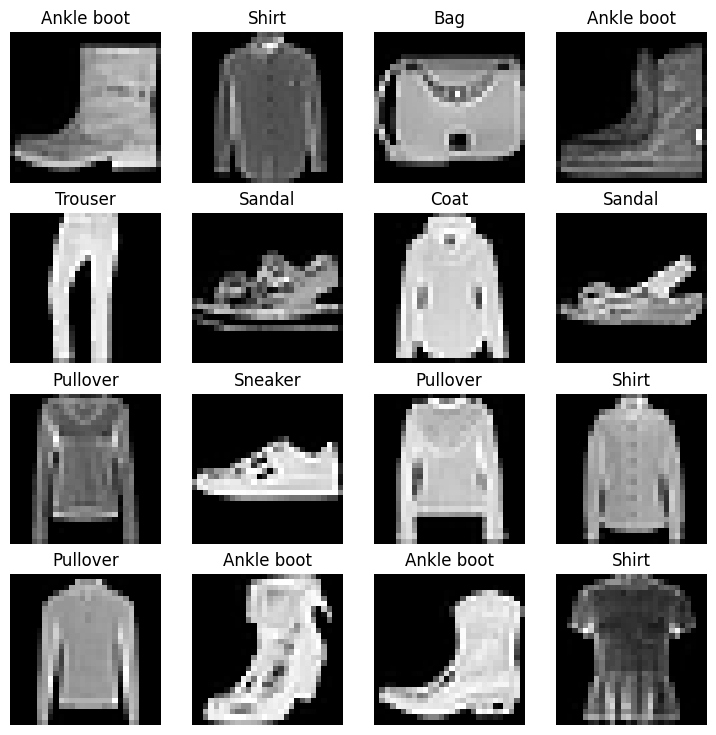

In [12]:
# plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

#### 2. Prepare DataLoader

In [13]:
from torch.utils.data import DataLoader

# batch size
batch_size = 32

# turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True) # shuffle data every epoch

# test dataloader
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False) # don't necessarily have to shuffle the testing data

In [14]:
print(f"Length of train dataloader: {len(train_dataloader)} batches of {batch_size}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {batch_size}")

Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [15]:
# chec what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))

train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [16]:
# show a sample
torch.manual_seed(42)
# random_idx = torch.randint(0, len(train_features_batch), size=1).item() # error occurs
# random_idx

In [17]:
# show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1])
random_idx

tensor([6])

In [18]:
# show a sample
torch.manual_seed(42)
# conver to a numpy scalar .item()
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
random_idx

6

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


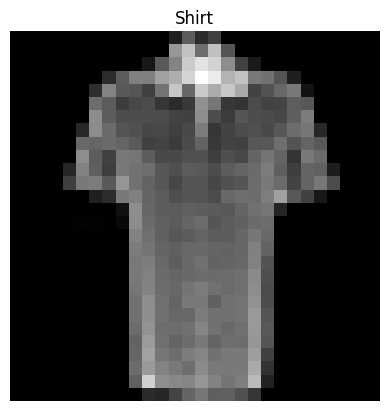

In [19]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

#### 3. Model 0: Build a baseline model

In [20]:
# create a flatten layer
flatten_model = nn.Flatten() # all nn modules function as a model (can do a forward pass)

# get a single sample
x = train_features_batch[0]

# flatten the sample
output = flatten_model(x) # perform forward pass

# check out
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, heightxwidth]") 

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, heightxwidth]


In [21]:
# print(x)
# print(output)

The `nn.Flatten()` layer took shape from `[color_channels, height, width]` to `[color_channels, height*width]`.

In order to turn pixel data from height and width dimensions into one long **feature vector**.

In [22]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(), # one long feature vector
            nn.Linear(in_features=input_shape, out_features=hidden_units), # in_features = number of features in a data sample (784 pixels)
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
    def forward(self, x):
        return self.layer_stack(x)

In [23]:
torch.manual_seed(42)

# create an instace of the model and send to the CPU
model_0 = FashionMNISTModelV0(input_shape=784, 
                              hidden_units=10, 
                              output_shape=len(class_names))

# keep model on CPU
model_0.to("cpu")

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [24]:
# download file 
import requests
from pathlib import Path

# download helper functions from a repo
if Path("helper_functions.py").is_file():
    print("The file already exists, skipping download")
else: 
    print("Downloading helper_functions.py")

    # need the `raw` GitHub URL to work
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

The file already exists, skipping download


##### 3.2 Creating a function to time the experiments

In [25]:
from timeit import default_timer as timer 
def print_train_time(start: float, end: float, device: torch.device = None):
    """ Prints difference between start and end time.

    Args:
        start (float): Start time of computation. 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None

    Returns:
        float: time between start and end in seconds (higer is longer) 
    """

    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")

    return total_time

##### 3.3 Creating a training loop and training a model on batches of data

In [26]:
# install tqdm for progress bar
!pip install tqdm

In [27]:
# import tqdm for progress bar
from tqdm.auto import tqdm

# epochs
epochs = 1000

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")

100%|██████████| 1000/1000 [00:00<00:00, 393683.50it/s]

Epoch: 0
-------
Epoch: 1
-------
Epoch: 2
-------
Epoch: 3
-------
Epoch: 4
-------
Epoch: 5
-------
Epoch: 6
-------
Epoch: 7
-------
Epoch: 8
-------
Epoch: 9
-------
Epoch: 10
-------
Epoch: 11
-------
Epoch: 12
-------
Epoch: 13
-------
Epoch: 14
-------
Epoch: 15
-------
Epoch: 16
-------
Epoch: 17
-------
Epoch: 18
-------
Epoch: 19
-------
Epoch: 20
-------
Epoch: 21
-------
Epoch: 22
-------
Epoch: 23
-------
Epoch: 24
-------
Epoch: 25
-------
Epoch: 26
-------
Epoch: 27
-------
Epoch: 28
-------
Epoch: 29
-------
Epoch: 30
-------
Epoch: 31
-------
Epoch: 32
-------
Epoch: 33
-------
Epoch: 34
-------
Epoch: 35
-------
Epoch: 36
-------
Epoch: 37
-------
Epoch: 38
-------
Epoch: 39
-------
Epoch: 40
-------
Epoch: 41
-------
Epoch: 42
-------
Epoch: 43
-------
Epoch: 44
-------
Epoch: 45
-------
Epoch: 46
-------
Epoch: 47
-------
Epoch: 48
-------
Epoch: 49
-------
Epoch: 50
-------
Epoch: 51
-------
Epoch: 52
-------
Epoch: 53
-------
Epoch: 54
-------
Epoch: 55
-------
Ep

In [28]:
# import tqdm for progress bar
from tqdm.auto import tqdm

# set the seed and start the timer
torch.manual_seed(42)

train_time_start_on_cpu = timer()

# epochs
epochs = 3

# loss function
loss_fn = nn.CrossEntropyLoss()

# optimizer 
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

# create training and testing loop
for epoch in tqdm(range(epochs)):

    print(f"Epoch: {epoch} \n -------")

    ### TRAINING
    train_loss = 0
    # add a loop to loop through training batches
    for batch, (X,y) in enumerate(train_dataloader):

        # train mode
        model_0.train()

        # forward pass
        y_pred = model_0(X)

        # calculate loss per batch
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch

        # set zero gradients
        optimizer.zero_grad()

        # loss backward
        loss.backward()

        # update parameters (weights, bias)
        optimizer.step()

        # print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch*len(X)}/ {len(train_dataloader.dataset)} samples")

    # divide total train loss by length of train dataloader 
    # (average loss per batch per epoch)   
    train_loss = train_loss / len(train_dataloader)


    ### TESTING
    test_loss, test_acc = 0.0, 0.0
    model_0.eval() # eval mode
    with torch.inference_mode():
        for X, y in test_dataloader:

            # forward pass
            test_pred = model_0(X)

            # calculate loss
            test_loss += loss_fn(test_pred, y)

            # calculate accuracu
            test_acc += torch.eq(y, torch.argmax(torch.softmax(test_pred, dim=1), dim=1)).sum().item()

        # calculate total test loss
        test_loss /= len(test_dataloader)

        # calculate total test loss
        test_acc /= (len(test_dataloader) * batch_size)
    print(f"\n Train loss: {train_loss:.5f} | Test loss: {test_loss:.5f} | Test acc: {test_acc * 100:.2f}%\n")

# calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
 -------
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 33%|███▎      | 1/3 [00:04<00:08,  4.39s/it]


 Train loss: 0.59039 | Test loss: 0.50954 | Test acc: 81.90%

Epoch: 1 
 -------
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


 67%|██████▋   | 2/3 [00:08<00:04,  4.24s/it]


 Train loss: 0.47633 | Test loss: 0.47989 | Test acc: 83.05%

Epoch: 2 
 -------
Looked at 0/ 60000 samples
Looked at 12800/ 60000 samples
Looked at 25600/ 60000 samples
Looked at 38400/ 60000 samples
Looked at 51200/ 60000 samples


100%|██████████| 3/3 [00:13<00:00,  4.37s/it]


 Train loss: 0.45503 | Test loss: 0.47664 | Test acc: 83.28%

Train time on cpu: 13.101 seconds


## 4. Make predictions and get Model 0 results

In [29]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    """ Returns a dictionary contaning the results of model predicting on data_loader
   
    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.

    Returns:
        (dict): Results of model making predictions on data_loader.
  
    """

    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            
            # make predictions
            y_pred = model(X)

            # calculate loss 
            loss += loss_fn(y_pred, y)
            acc += torch.eq(y, torch.argmax(torch.softmax(y_pred, dim=1), dim=1)).sum().item()

        # average loss/acc per batch
        loss /= len(data_loader)
        acc /= (len(data_loader) * batch_size)

    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}


# calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader, loss_fn=loss_fn)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 0.8327675718849841}

#### 5. Setup device agnostic-code (for using a GPU if there is one)

In [30]:
# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

##### 6. Model 1: Building a better model with non-linearity


In [31]:
# create a model with non-linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [32]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, hidden_units=10, output_shape=len(class_names))

# send modle to GPU if it's available
model_1.to(device)

# check model device
next(model_1.parameters()).device

device(type='cuda', index=0)

##### 6.1 Setup loss, optimizer and evaluation metrics

In [33]:
# loss function
loss_fn = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

##### 6.2 Functionizing training and test loops

In [34]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device = device):
    
    train_loss, train_acc = 0.0, 0.0
    train_batches = 0
    model.to(device)
    for X,y in data_loader:

        # train mode
        model.train()
        
        # send data to GPU
        X, y = X.to(device), y.to(device)

        # forward pass
        y_pred = model(X)

        # calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss

        # calculate accuracy
        acc =  torch.eq(y, torch.argmax(torch.softmax(y_pred, dim=1), dim=1)).sum().item() # from logits -> pred labels
        train_acc += acc

        train_batches += 1

        # set zero gradients
        optimizer.zero_grad()

        # backward
        loss.backward()

        # update parameters
        optimizer.step()

    # calculate loss and accuracy per epoch and print them out
    train_loss /= len(data_loader)
    train_acc = train_acc / (batch_size * train_batches)

    print(f"Train loss: {train_loss: .5f} | Train accuracy: {train_acc:.2f}")


In [35]:
len(train_data), len(test_data)

(60000, 10000)

In [36]:
def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device = device):
    
    test_loss, test_acc = 0.0, 0.0
    test_batches = 0
    model.to(device)
    model.eval()
    with torch.inference_mode(): # turn on inference context manager
        for X,y in data_loader:

            # send data to GPU
            X, y = X.to(device), y.to(device)

            # forward pass
            y_pred = model(X)

            # calculate loss
            loss = loss_fn(y_pred, y)
            test_loss += loss

            # calculate accuracy
            acc =  torch.eq(y, torch.argmax(torch.softmax(y_pred, dim=1), dim=1)).sum().item() # from logits -> pred labels
            test_acc += acc  

            test_batches += 1

        # calculate loss and accuracy per epoch and print them out
        test_loss /= len(data_loader)
        test_acc = test_acc / (batch_size * test_batches)

        print(f"Test loss: {test_loss: .5f} | Test accuracy: {test_acc:.2f}")


In [37]:
torch.manual_seed(42)

# measure time
from timeit import default_timer as timer

# start training time
train_time_start_on_gpu = timer()

# epochs 
epochs = 3
for epoch in tqdm(range(epochs)):

    print(f"Epoch: {epoch} \n-----")

    train_step(data_loader=train_dataloader,
               model=model_1,
               loss_fn=loss_fn,
               optimizer=optimizer)
    
    test_step(data_loader=test_dataloader,
              model=model_1,
              loss_fn=loss_fn,
              optimizer=optimizer)
    
# end training time
train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu, 
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
-----
Train loss:  1.09199 | Train accuracy: 0.61


 33%|███▎      | 1/3 [00:05<00:10,  5.10s/it]

Test loss:  0.95636 | Test accuracy: 0.65
Epoch: 1 
-----
Train loss:  0.78101 | Train accuracy: 0.72


 67%|██████▋   | 2/3 [00:11<00:05,  5.67s/it]

Test loss:  0.72227 | Test accuracy: 0.74
Epoch: 2 
-----
Train loss:  0.67027 | Train accuracy: 0.76


100%|██████████| 3/3 [00:16<00:00,  5.39s/it]

Test loss:  0.68500 | Test accuracy: 0.75
Train time on cuda: 16.164 seconds


In [38]:
torch.manual_seed(42)

# Note: This will error due to `eval_model()` not using device agnostic code 
# model_1_results = eval_model(model=model_1, 
#     data_loader=test_dataloader,
#     loss_fn=loss_fn) 
# model_1_results 

In [39]:
torch.manual_seed(42)
def eval_model_on_device(model: torch.nn.Module, 
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device = device):
    """ Returns a dictionary contaning the results of model predicting on data_loader
   
    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
  
    """

    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            
             # Send data to the target device
            X, y = X.to(device), y.to(device)

            # make predictions
            y_pred = model(X)

            # calculate loss 
            loss += loss_fn(y_pred, y)
            acc += torch.eq(y, torch.argmax(torch.softmax(y_pred, dim=1), dim=1)).sum().item()

        # average loss/acc per batch
        loss /= len(data_loader)
        acc /= (len(data_loader) * batch_size)

    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc * 100}

In [40]:
# calculate model 1 results on test dataset
model_1_results = eval_model_on_device(model=model_1, data_loader=test_dataloader, loss_fn=loss_fn, device=device)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008368492126,
 'model_acc': 74.88019169329073}

In [41]:
# dheck baseline results
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 0.8327675718849841}

##### 7. Model 2: Building a Convolutional Neural Network (CNN)

In [42]:
# create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """

    def __init__(self, input_shape: int, hidden_units: int, output_shape:int):
        super().__init__()

        self.block_1 = nn.Sequential(
            # padding "valid" (no padding) 
            # padding "same" (output has same shape as input) or int for specific number 
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2) #  # default stride value is same as kernel_size
        )

        self.block_2 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2) #  # default stride value is same as kernel_size
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            # nn.Linear(in_features=hidden_units, out_features=output_shape) # TODO
            nn.Linear(in_features=hidden_units*7*7, out_features=output_shape)
        )

        def forward(self, x: torch.Tensor):

            x = self.block_1(x)
            print(x.shape)
            x = self.block_2(x)
            print(x.shape)
            x = self.classifier(x)
            print(x.shape)

            return x 


In [43]:
# create a CNN model
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, hidden_units=10, output_shape=len(class_names)).to(device)

model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [44]:
from torchvision.transforms import transforms
from PIL import Image

# Load the image
image = Image.open('../data/04-pizza-dad.jpeg')

# Convert the image to a PyTorch tensor
transform = transforms.Compose([transforms.Resize(size=(64, 64)), transforms.ToTensor()])
image = transform(image)

# Display the image
# plt.imshow(image.permute(1, 2, 0))
# plt.show()

In [45]:
# torch is in shape of [channel, height, width]
# need to convert it into [height, width, channel] by permute()
reshaped_img = image.permute(1, 2, 0)
reshaped_img.shape

torch.Size([64, 64, 3])

In [46]:
test_image = reshaped_img # a single image for testing
print(f"Single image shape: {test_image.shape} -> [height, width, channel]") 

Single image shape: torch.Size([64, 64, 3]) -> [height, width, channel]


In [47]:
# input shape
image.shape

torch.Size([3, 64, 64])

In [48]:
# create a convolutional layer 
torch.manual_seed(42)
conv_layer = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=3, stride=1, padding=0)

# pass the data through the conv layer
output_conv_layer = conv_layer(image) 

In [49]:
output_conv_layer[0].shape

torch.Size([62, 62])

In [50]:
torch.manual_seed(42)
# Create a new conv_layer with different values (try setting these to whatever you like)
conv_layer_2 = nn.Conv2d(in_channels=3, # same number of color channels as our input image
                         out_channels=10,
                         kernel_size=(5, 5), # kernel is usually a square so a tuple also works
                         stride=2,
                         padding=0)

# Pass single image through new conv_layer_2 (this calls nn.Conv2d()'s forward() method on the input)
conv_layer_2(image).shape

torch.Size([10, 30, 30])

In [51]:
# check out the conv_layer_2
conv_layer_2.state_dict()

OrderedDict([('weight',
              tensor([[[[ 0.0883,  0.0958, -0.0271,  0.1061, -0.0253],
                        [ 0.0233, -0.0562,  0.0678,  0.1018, -0.0847],
                        [ 0.1004,  0.0216,  0.0853,  0.0156,  0.0557],
                        [-0.0163,  0.0890,  0.0171, -0.0539,  0.0294],
                        [-0.0532, -0.0135, -0.0469,  0.0766, -0.0911]],
              
                       [[-0.0532, -0.0326, -0.0694,  0.0109, -0.1140],
                        [ 0.1043, -0.0981,  0.0891,  0.0192, -0.0375],
                        [ 0.0714,  0.0180,  0.0933,  0.0126, -0.0364],
                        [ 0.0310, -0.0313,  0.0486,  0.1031,  0.0667],
                        [-0.0505,  0.0667,  0.0207,  0.0586, -0.0704]],
              
                       [[-0.1143, -0.0446, -0.0886,  0.0947,  0.0333],
                        [ 0.0478,  0.0365, -0.0020,  0.0904, -0.0820],
                        [ 0.0073, -0.0788,  0.0356, -0.0398,  0.0354],
                     

In [52]:
# get shapes of weight and bias tensors within conv_layer_2
print(f"conv_layer_2 weight shape: \n{conv_layer_2.weight.shape} -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]")
print(f"\nconv_layer_2 bias shape: \n{conv_layer_2.bias.shape} -> [out_channels=10]")

conv_layer_2 weight shape: 
torch.Size([10, 3, 5, 5]) -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]

conv_layer_2 bias shape: 
torch.Size([10]) -> [out_channels=10]


##### 7.2 Stepping through `nn.MaxPool2d()`

In [53]:
print(f"Test image original shape: {image.shape}")
print(f"Test image with unsqueezed dimension: {image.unsqueeze(dim=0).shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])


In [54]:
# create a sample nn.MaxPool2d
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# forward pass
img_conv = conv_layer(image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {img_conv.shape}")

# forward pass though max pool layer
img_max_pool = max_pool_layer(img_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {img_max_pool.shape}")


Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


In [55]:
img_max_pool[0][0].unsqueeze(dim=0).shape

torch.Size([1, 31, 31])

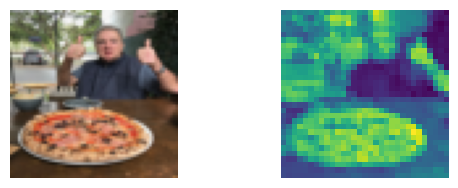

In [57]:
plt.subplot(2,2,1)
plt.imshow(image.permute(1, 2, 0))
plt.axis(False)
plt.subplot(2,2,2)
plt.imshow(img_max_pool[0][0].unsqueeze(dim=0).permute(1, 2, 0).detach().numpy())
plt.axis(False)
plt.show()
